In [1]:
import numpy as np
import random as rand
#import network_equ_xy_energy 
#import network_gen_isotropic 
import openpyxl 
import collections
import timeit
import glob
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import cm
import math


In [23]:

title_font = {'fontname':'Arial', 'size':'15', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'13'}
font = matplotlib.font_manager.FontProperties(family='Arial',style='normal', size=12)


In [3]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [4]:
## Redoing figure 3 and checking if the degrees of freedom have a significant influence
## This CSV file is from the uniaxial tests run again for the revision, not from the original data
## The results are the same
## Note that because this is not the original data it does not have the derivatives for uniaxial, just total energy
## Also, energy not scaled in this data-set
data_uniax = pd.read_csv('networks_uniaxial.csv')  

In [5]:
data_uniax

seeds  cube_length  fiber_diameter  percent_volume_fraction  \
0       250         21.7             0.1                 0.303669   
1       250         21.7             0.1                 0.303669   
2       250         21.7             0.1                 0.303669   
3       250         21.7             0.1                 0.303669   
4       250         21.7             0.1                 0.303669   
...     ...          ...             ...                      ...   
1095    400         27.0             0.1                 0.311840   
1096    400         27.0             0.1                 0.311840   
1097    400         27.0             0.1                 0.311840   
1098    400         27.0             0.1                 0.311840   
1099    400         27.0             0.1                 0.311840   

      total_fibers  inner_nodes  percent_inner_node  lambdaX   lambdaY  \
0              363          113               0.452    1.000  1.000000   
1              363          113               0.452    1.025  0.987730   
2              363          113               0.452    1.050  0.975900   
3              363          113               0.452    1.075  0.964486   
4              363          113               0.452    1.100  0.953463   
...            ...          ...                 ...      ...       ...   
1095           620          220               0.550    1.150  0.932505   
1096           620          220               0.550    1.175  0.922531   
1097           620          220               0.550    1.200  0.912871   
1098           620          220               0.550    1.225  0.903508   
1099           620          220               0.550    1.250  0.894427   

       lambdaZ   sigmaXX   sigmaYY   sigmaZZ        I1        I2     Psi_f  
0     1.000000  0.000000  0.000000  0.000000  3.000000  3.000000  0.000000  
1     0.987730  0.121986  0.014301 -0.074385  3.001845  3.001814  0.001117  
2     0.975900  0.294865  0.033614 -0.099197  3.007262  3.007029  0.015254  
3     0.964486  0.459346  0.082632 -0.130885  3.016090  3.015333  0.009475  
4     0.953463  0.676919  0.123164 -0.171480  3.028182  3.026446  0.017585  
...        ...       ...       ...       ...       ...       ...       ...  
1095  0.932505  1.384228  0.208731 -0.073524  3.061630  3.056144  0.076462  
1096  0.922531  1.682580  0.261614 -0.073218  3.082753  3.074310  0.086028  
1097  0.912871  2.145718  0.318212 -0.066908  3.106667  3.094444  0.132875  
1098  0.903508  2.596727  0.379491 -0.058459  3.133278  3.116389  0.169393  
1099  0.894427  3.068065  0.444161 -0.021716  3.162500  3.140000  0.216330  

[1100 rows x 16 columns]

In [6]:
## Plot stress in x as a function of stretch in x for all data, and then for 
# data with high number of degrees of freedom 

n_data = 1100

# I think there are 100 RVEs for this microstructure
sigmaX_uni = np.zeros((11,100))
Psi_uni = np.zeros((11,100))
Psi_uni_unscaled = np.zeros((11,100))

# I want to extract the ones with higher number of degrees of freedom 
# to test if the RVEs are converged 
sigmaX_uni_HD = np.zeros((11,100))
Psi_uni_HD = np.zeros((11,100))
Psi_uni_HD_unscaled = np.zeros((11,100))

# store the volume fraction per sample
theta_dist = np.zeros((100))
theta_dist_HD = np.zeros((100))

# store the seeds per sample
seeds_dist = np.zeros((100))
seeds_dist_HD = np.zeros((100))

# store the seeds per sample
dof_dist = np.zeros((100))


lamdaX_uni = np.zeros((11))
sample_cnt = 0
sample_HD = 0
step_cnt = 0
for i in range(n_data):
    lamdaX = data_uniax['lambdaX'][i]
    if sample_cnt==0:
        lamdaX_uni[step_cnt] = lamdaX
    sigmaX_uni[step_cnt,sample_cnt]=data_uniax['sigmaXX'][i]
    Psi_uni[step_cnt,sample_cnt]=data_uniax['Psi_f'][i]/data_uniax['cube_length'][i]**2*1000
    Psi_uni_unscaled[step_cnt,sample_cnt]=data_uniax['Psi_f'][i]
    if data_uniax['percent_inner_node'][i]>=0.55:
        sigmaX_uni_HD[step_cnt,sample_HD]=data_uniax['sigmaXX'][i]
        Psi_uni_HD[step_cnt,sample_HD]=data_uniax['Psi_f'][i]/data_uniax['cube_length'][i]**2*1000
        Psi_uni_HD_unscaled[step_cnt,sample_HD]=data_uniax['Psi_f'][i]
    step_cnt +=1
    if lamdaX==1.25:
        theta_dist[sample_cnt] = data_uniax['percent_volume_fraction'][i]
        seeds_dist[sample_cnt] = data_uniax['seeds'][i]
        dof_dist[sample_cnt] = data_uniax['percent_inner_node'][i]
        sample_cnt+=1
        if data_uniax['percent_inner_node'][i]>=0.55:
            theta_dist_HD[sample_HD] = data_uniax['percent_volume_fraction'][i]
            seeds_dist_HD[sample_HD] = data_uniax['seeds'][i]
            sample_HD+=1
        step_cnt=0
print(sample_HD)

48


In [7]:
Psi_uni[0,:] = 0
x_axis = np.round(np.arange(1,1.251,0.025), decimals=3)
sigma_mean = np.zeros((11))
sigma_std =  np.zeros((11))
psi_mean =   np.zeros((11))
psi_std =   np.zeros((11))
for i in range(11):
    sigma_mean[i] = sigmaX_uni[i,:].mean()
    sigma_std[i] = sigmaX_uni[i,:].std()
    psi_mean[i] = Psi_uni[i,:].mean()
    psi_std[i] = Psi_uni[i,:].std()

sigma_confidence = 1.96*np.array(sigma_std)
sigma_down = np.array(sigma_mean) - np.array(sigma_confidence)
sigma_up = np.array(sigma_mean) + np.array(sigma_confidence)

psi_confidence = 1.96*np.array(psi_std)
psi_down = np.array(psi_mean) - np.array(psi_confidence)
psi_up = np.array(psi_mean) + np.array(psi_confidence)


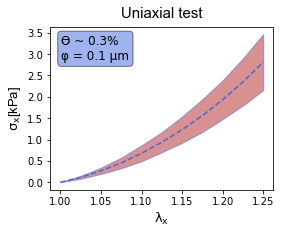

In [12]:
fig, ax = plt.subplots(figsize=(4,3))

plt.plot(x_axis, sigma_mean, color='royalblue', linestyle='dashed')
plt.fill_between(x_axis, sigma_down, sigma_up, alpha=0.5, edgecolor='royalblue', facecolor='firebrick')
textstr = '\n'.join(('\u03F4' +' ~ 0.3%', '\u03C6 = 0.1 ' + '\u03BC' + 'm'))
props = dict(boxstyle='round', facecolor='royalblue', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
plt.ylabel(r'$\mathrm{\sigma_x}$[kPa]',**axis_font)
plt.title('Uniaxial test',**title_font)
plt.xlabel(r'$\mathrm{\lambda_x}$',**axis_font )
plt.savefig('sigmax_uniaxial.pdf', dpi = 300, bbox_inches='tight') 


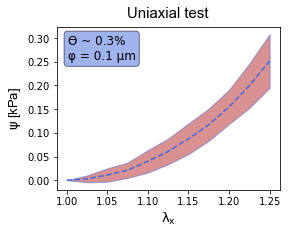

In [13]:
fig, ax = plt.subplots(figsize=(4,3))

plt.plot(x_axis, psi_mean, color='royalblue', linestyle='dashed')
plt.fill_between(x_axis, psi_down, psi_up, alpha=0.5, edgecolor='royalblue', facecolor='firebrick')
textstr = '\n'.join(('\u03F4' +' ~ 0.3%', '\u03C6 = 0.1 ' + '\u03BC' + 'm'))
props = dict(boxstyle='round', facecolor='royalblue', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
plt.ylabel(r'$\mathrm{\psi}$ [kPa]',**axis_font)
plt.title('Uniaxial test',**title_font)
plt.xlabel(r'$\mathrm{\lambda_x}$',**axis_font )
plt.savefig('psi_uniaxial.pdf', dpi = 300, bbox_inches='tight') 

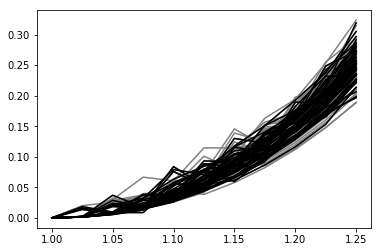

In [14]:
## Plotting all curves instead of confidence interval
# just to get an idea of spread
Psi_uni[0,:]=0
Psi_uni_HD[0,:]=0
for i in range(sample_cnt):
    plt.plot(lamdaX_uni,Psi_uni[:,i],color='grey')
for i in range(sample_HD):
    plt.plot(lamdaX_uni,Psi_uni_HD[:,i],color='black')

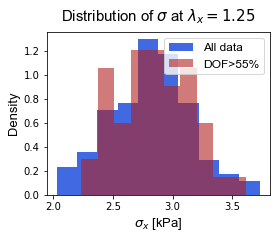

In [26]:
## let's look at the histogram of the stresses
# easier to see the distribution
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(sigmaX_uni[-1,:],density=True,label='All data',color='royalblue')
ax.hist(sigmaX_uni_HD[-1,:sample_HD],density=True,alpha=0.6,label='DOF>55%',color='firebrick')
ax.legend(loc=0,prop=font)
ax.set_title(r'Distribution of $\sigma$ at $\lambda_x=1.25$',**title_font)
ax.set_xlabel(r'$\sigma_x$ [kPa]',**axis_font)
ax.set_ylabel('Density',**axis_font)

plt.savefig('sigma_uni_distribution.pdf',dpi=300,bbox_inches='tight')

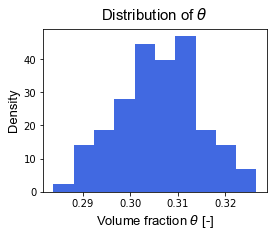

In [27]:
# The volume fraction itself has some uncertainty
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(theta_dist,density=True,label='all data',color='royalblue')
#plt.hist(theta_dist_HD[:sample_HD],density=True,alpha=0.6,label='DOF>55%')
#plt.legend(loc=0)
ax.set_title(r'Distribution of $\theta$ ',**title_font)
ax.set_xlabel(r'Volume fraction $\theta$ [-]',**axis_font)
ax.set_ylabel('Density',**axis_font)
plt.savefig('theta_0.3_distribution.pdf',dpi=300,bbox_inches='tight')

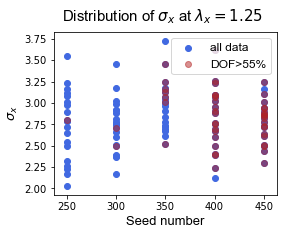

In [34]:
## plot with respect to seed number 
fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(seeds_dist,sigmaX_uni[-1,:],label='all data',color='royalblue')
ax.scatter(seeds_dist_HD[:sample_HD],sigmaX_uni_HD[-1,:sample_HD],label='DOF>55%',color='firebrick',alpha=0.5)
ax.legend(loc=1,prop=font)
ax.set_title(r'Distribution of $\sigma_x$ at $\lambda_x=1.25$  ',**title_font)
ax.set_xlabel('Seed number',**axis_font)
ax.set_ylabel(r'$\sigma_x$',**axis_font)
plt.savefig('sigma_seed_and_dof.pdf',dpi=300,bbox_inches='tight')

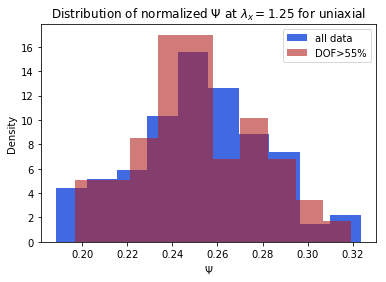

In [14]:
# show the distribution of strain energy density as well
plt.hist(Psi_uni[-1,:],density=True,label='all data',color='royalblue')
plt.hist(Psi_uni_HD[-1,:sample_HD],density=True,alpha=0.6,label='DOF>55%',color='firebrick')
plt.legend(loc=0)
plt.title(r'Distribution of normalized $\Psi$ at $\lambda_x=1.25$ for uniaxial')
plt.xlabel(r'$\Psi$')
plt.ylabel('Density')
plt.savefig('Psi_uni_distribution.png',dpi=200)

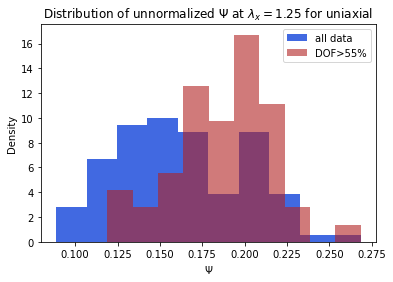

In [15]:
# Show that the original version of the Psi was not scaled
plt.hist(Psi_uni_unscaled[-1,:],density=True,label='all data',color='royalblue')
plt.hist(Psi_uni_HD_unscaled[-1,:sample_HD],density=True,alpha=0.6,label='DOF>55%',color='firebrick')
plt.legend(loc=0)
plt.title(r'Distribution of unnormalized $\Psi$ at $\lambda_x=1.25$ for uniaxial')
plt.xlabel(r'$\Psi$')
plt.ylabel('Density')
plt.savefig('Psi_uni_distribution_unscaled.png',dpi=200)

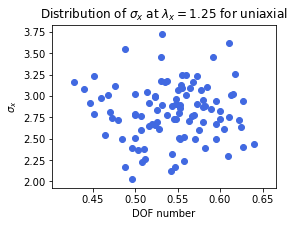

In [35]:
# scatter with respect to DOF number
fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(dof_dist,sigmaX_uni[-1,:],label='all data',color='royalblue')
#plt.scatter(dof_dist_HD[:sample_HD],sigmaX_uni_HD[-1,:sample_HD],label='DOF>55%',color='pink',alpha=0.5)
#plt.legend(loc=0)
ax.set_title(r'Distribution of $\sigma_x$ at $\lambda_x=1.25$ for uniaxial')
ax.set_xlabel('DOF number')
ax.set_ylabel(r'$\sigma_x$')
plt.savefig('sigma_vs_DOF.pdf',dpi=300,bbox_inches='tight')

In [16]:
# Read the uniaxial data from all networks 
# Here again this is from the new run for the revision, not the original data
data_uniaxial_all = pd.read_csv('networks_uniaxial_all.csv')  

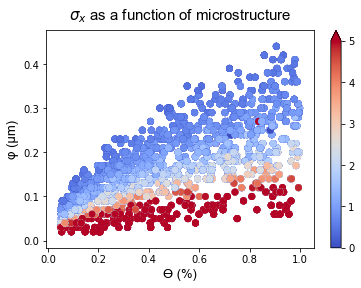

In [30]:
fig, ax = plt.subplots()
im = ax.scatter(data_uniaxial_all['percent_volume_fraction'], data_uniaxial_all['fiber_diameter'], c=data_uniaxial_all['sigmaXX'], cmap= 'coolwarm')
im.set_clim(0,5) # 0.2 is better than psi_contour_data['total_psif'].max()
fig.colorbar(im, ax=ax, extend = 'max')

plt.title(r'$\sigma_x$ as a function of microstructure',**title_font)
params = {'mathtext.default': 'regular' }   
plt.xlabel('\u03F4 (%)',**axis_font)
plt.ylabel('\u03C6 (' + '\u03BC' +'m)',**axis_font)
plt.savefig('uniaxial_wrt_microstructure.pdf', dpi=300,bbox_inches = "tight") #Fig 3C


Text(0, 0.5, 'φ (μm)')

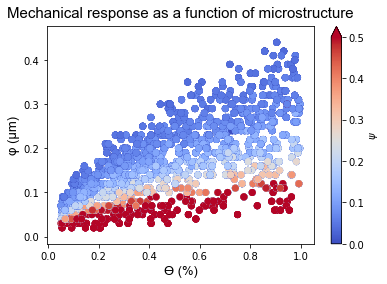

In [175]:
fig, ax = plt.subplots()
im = ax.scatter(data_uniaxial_all['percent_volume_fraction'], data_uniaxial_all['fiber_diameter'], c=data_uniaxial_all['total_psif']/data_uniaxial_all['cube_length']**2*1000, cmap= 'coolwarm')
im.set_clim(data_uniaxial_all['total_psif'].min(),0.5) # 0.2 is better than psi_contour_data['total_psif'].max()
fig.colorbar(im, ax=ax, extend = 'max',label=r'$\psi$')

plt.title('Mechanical response as a function of microstructure',**title_font)
params = {'mathtext.default': 'regular' }   
plt.xlabel('\u03F4 (%)',**axis_font)
plt.ylabel('\u03C6 (' + '\u03BC' +'m)',**axis_font)
#plt.savefig('Dependence of energy on theta and fiber diameter.pdf', dpi=500,bbox_inches = "tight") #Fig 4C
